In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import cv2

In [3]:
data_dir='D:\\deep learning\\train'
categories=['Dog','Cat']

In [4]:
img_file=data_dir+'\\Dog\\Dog.66.jpg'
img_file

'D:\\deep learning\\train\\Dog\\Dog.66.jpg'

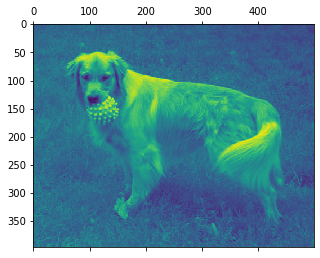

In [5]:
image = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
plt.matshow(image)  
#              # --> show the gray scale image using matplotlib



cv2.imshow('image',image)  #window_name = 'image', file --> image
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
print(image)

[[115 118 115 ...  90  91  93]
 [113 116 114 ...  92  93  95]
 [109 112 112 ...  91  92  93]
 ...
 [124 122 138 ... 111 111 111]
 [122 117 135 ... 113 113 113]
 [134 118 130 ... 114 114 114]]


In [7]:
image.shape

(397, 499)

In [8]:
img_size=50
new_ar=cv2.resize(image,(img_size,img_size))

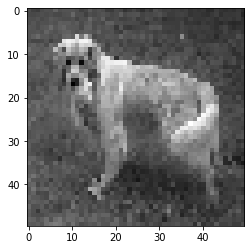

In [9]:
plt.imshow(new_ar,cmap='gray')
#plt.matshow(new_ar)

In [10]:
# 0 is for Dog and 1 is for Cat

In [11]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [12]:
create_training_data()

In [13]:
len(training_data)

25000

In [14]:
import random
random.shuffle(training_data)

In [15]:
for sample in training_data[0:10]:
    print(sample[0])

[[130 135 138 ... 139 137 135]
 [133 137 140 ... 142 138 138]
 [137 138 144 ... 145 141 144]
 ...
 [171 169 170 ... 150 143 141]
 [168 172 179 ... 155 145 139]
 [171 175 177 ... 147 141 136]]
[[ 78  34 104 ...  51  55  38]
 [ 36  76  51 ...  98  95  94]
 [ 84  58  78 ... 101 112 118]
 ...
 [255 255 255 ... 176 177 190]
 [255 255 255 ... 166 176 162]
 [255 255 255 ... 164 183 175]]
[[ 16  18  24 ...  78 132 142]
 [ 24  21  23 ... 109 135 138]
 [ 25  23  30 ... 139 142 139]
 ...
 [120 121 151 ... 124 117 110]
 [152 163 166 ... 119 111 104]
 [128 132 143 ... 117 106  98]]
[[131  93  42 ... 101  79  63]
 [126  76  95 ... 181 161 108]
 [ 89 106  45 ... 213 212 207]
 ...
 [ 94  80  52 ... 120 118  93]
 [135  82  77 ... 139 121 106]
 [100  85 115 ... 145 133  84]]
[[100 107 163 ...  59  49  50]
 [145 153 137 ...  59  57  49]
 [144 193  96 ... 118 121 157]
 ...
 [ 12  98 114 ...  55  97  87]
 [105 127 132 ... 103  95  86]
 [115 129 131 ... 106  96  82]]
[[158  76 231 ...  49  22  27]
 [217 214

In [16]:
x=[]
y=[]

In [17]:
for features,label in training_data:
    x.append(features)
    y.append(label)

In [64]:
x=np.array(x)
print(x[0:5])
y=np.array(y)

[[[130 135 138 ... 139 137 135]
  [133 137 140 ... 142 138 138]
  [137 138 144 ... 145 141 144]
  ...
  [171 169 170 ... 150 143 141]
  [168 172 179 ... 155 145 139]
  [171 175 177 ... 147 141 136]]

 [[ 78  34 104 ...  51  55  38]
  [ 36  76  51 ...  98  95  94]
  [ 84  58  78 ... 101 112 118]
  ...
  [255 255 255 ... 176 177 190]
  [255 255 255 ... 166 176 162]
  [255 255 255 ... 164 183 175]]

 [[ 16  18  24 ...  78 132 142]
  [ 24  21  23 ... 109 135 138]
  [ 25  23  30 ... 139 142 139]
  ...
  [120 121 151 ... 124 117 110]
  [152 163 166 ... 119 111 104]
  [128 132 143 ... 117 106  98]]

 [[131  93  42 ... 101  79  63]
  [126  76  95 ... 181 161 108]
  [ 89 106  45 ... 213 212 207]
  ...
  [ 94  80  52 ... 120 118  93]
  [135  82  77 ... 139 121 106]
  [100  85 115 ... 145 133  84]]

 [[100 107 163 ...  59  49  50]
  [145 153 137 ...  59  57  49]
  [144 193  96 ... 118 121 157]
  ...
  [ 12  98 114 ...  55  97  87]
  [105 127 132 ... 103  95  86]
  [115 129 131 ... 106  96  82]]]


In [22]:
#reshape for any size (i.e any features), 1D array
# -1 for all features (i.e size)
# 1 --> gray scale image

X = x.reshape(-1,img_size, img_size, 1)
print(X[0:5])             #print intial few indexes

[[[[130]
   [135]
   [138]
   ...
   [139]
   [137]
   [135]]

  [[133]
   [137]
   [140]
   ...
   [142]
   [138]
   [138]]

  [[137]
   [138]
   [144]
   ...
   [145]
   [141]
   [144]]

  ...

  [[171]
   [169]
   [170]
   ...
   [150]
   [143]
   [141]]

  [[168]
   [172]
   [179]
   ...
   [155]
   [145]
   [139]]

  [[171]
   [175]
   [177]
   ...
   [147]
   [141]
   [136]]]


 [[[ 78]
   [ 34]
   [104]
   ...
   [ 51]
   [ 55]
   [ 38]]

  [[ 36]
   [ 76]
   [ 51]
   ...
   [ 98]
   [ 95]
   [ 94]]

  [[ 84]
   [ 58]
   [ 78]
   ...
   [101]
   [112]
   [118]]

  ...

  [[255]
   [255]
   [255]
   ...
   [176]
   [177]
   [190]]

  [[255]
   [255]
   [255]
   ...
   [166]
   [176]
   [162]]

  [[255]
   [255]
   [255]
   ...
   [164]
   [183]
   [175]]]


 [[[ 16]
   [ 18]
   [ 24]
   ...
   [ 78]
   [132]
   [142]]

  [[ 24]
   [ 21]
   [ 23]
   ...
   [109]
   [135]
   [138]]

  [[ 25]
   [ 23]
   [ 30]
   ...
   [139]
   [142]
   [139]]

  ...

  [[120]
   [121]
   [151]
   

Model saving and retrieving mode using pickle

In [18]:
import pickle

In [19]:
#saving x
open_data=open('X.pickle','wb')
pickle.dump(x,open_data)
open_data.close()

In [20]:
#saving y
open_data=open('y.pickle','wb')
pickle.dump(y,open_data)
open_data.close()

Retrievng model using load

In [33]:
import pickle
pickle_in=open('X.pickle','rb')
x=pickle.load(pickle_in)

In [34]:
pickle_in=open('y.pickle','rb')
y=pickle.load(pickle_in)

<h1>Now Performing convolutional NN processing</h1>

In [35]:
import keras

In [36]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [38]:
#Normalize the image data, divide each pixel by 255
X = X / 255.0

In [39]:
X.shape

(25000, 50, 50, 1)

In [44]:
model=Sequential()
#for group 1 layer
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [45]:
#for group 2 layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [46]:
#group layer 3
model.add(Flatten())
model.add(Dense(64))

In [47]:
#form output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [48]:
model.compile(loss='binary_crossentropy',
optimizer='adam',metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)             

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 )

In [69]:
#do fitment
#batch size --> 32, so perform 32 samples at a time
model.fit(X_train, y_train, batch_size=32, epochs=1)


625/625 [==============================] - 76s 119ms/step - loss: 0.5379 - accuracy: 0.7351


In [93]:
pred=model.predict(X_test)

In [88]:
pred[0]


array([0.08610898], dtype=float32)

In [89]:
y_test[0]

0

In [94]:
model.evaluate(X_test,y_test)

157/157 [==============================] - 7s 42ms/step - loss: 0.5019 - accuracy: 0.7608


[0.5018986463546753, 0.7608000040054321]